In [5]:
# In this cell, we just import pandas, plotly and the penguins dataset
import pandas as pd
import plotly.io as pio
pio.renderers.default = 'png'
import plotly as plt
import plotly.express as px
penguins=pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [4]:
pip install -U kaleido

Note: you may need to restart the kernel to use updated packages.


<h1 style="color:red;">Question I</h1>

<p>
    The below code was given to me by <a href="https://chatgpt.com/share/66f31584-bfa8-8002-9dd4-667299c9c8c2">ChatGPT</a>
    <br/>I chose to give each species its own figure as it was really cramped and otherwise unreadable.
    <br/>The code first gave me an error but it turns out I simply didn't have the required extension to use kaleido, the png renderer.
    <br/> I also modified the location of some captions to make the figures easier to read, as the mean and median were "fused"
</p>

<h3>Here is a summary of my discussion with chatGPT:</h3>
<ol>
    <li>Plotly Markings for Histograms: You asked how to use fig.add_hline(), fig.add_vline(), fig.add_hrect(), and fig.add_vrect() in Plotly to mark statistical values (mean, median, range, interquartile range, and standard deviations) on histograms of the flipper_length_mm for each species in the penguins dataset.</li>

<li>Modifications for Separate Figures: You requested that the figures be divided, one per species, and that they be saved as PNG images. We added logic to handle each species separately and calculate the relevant statistics. The figures were to be saved as PNG files using fig.write_image(), but this raised an error because Plotly requires external dependencies (Kaleido or Orca) for static image export.</li>

<li>Attempt to Display Inline PNGs: You then asked to display the figures as PNGs inline using fig.show(renderer='png') instead of saving them. However, this approach also requires the installation of Kaleido to render PNGs.</li>

<li>Final Resolution: The recommended solution was to install Kaleido (pip install -U kaleido), after which the original approach using fig.show(renderer='png') would work correctly for inline rendering of PNGs.</li>
</ol>

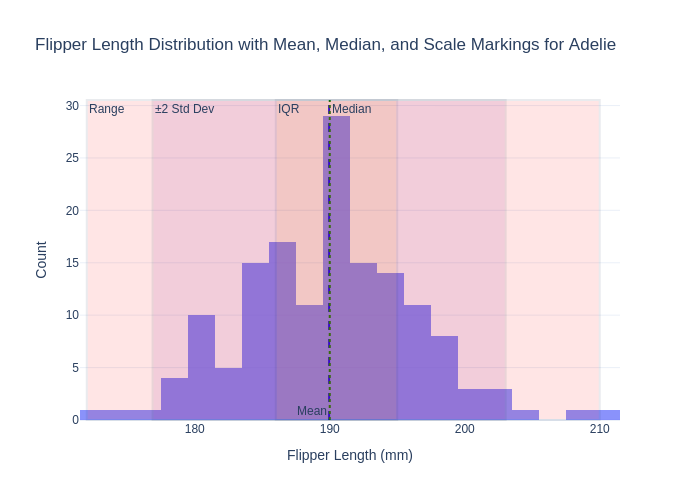

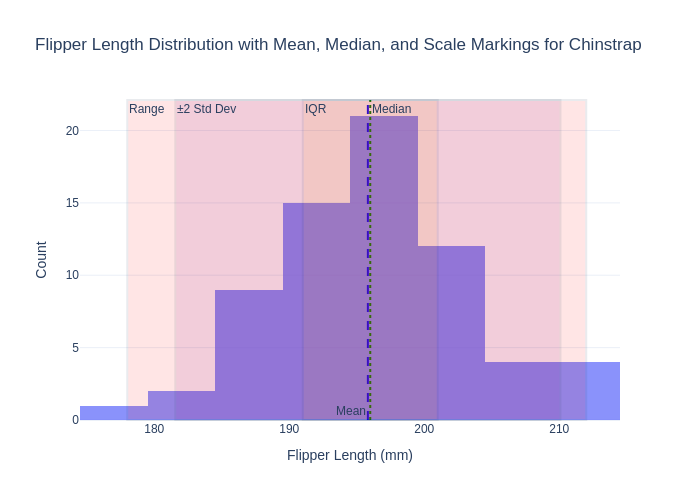

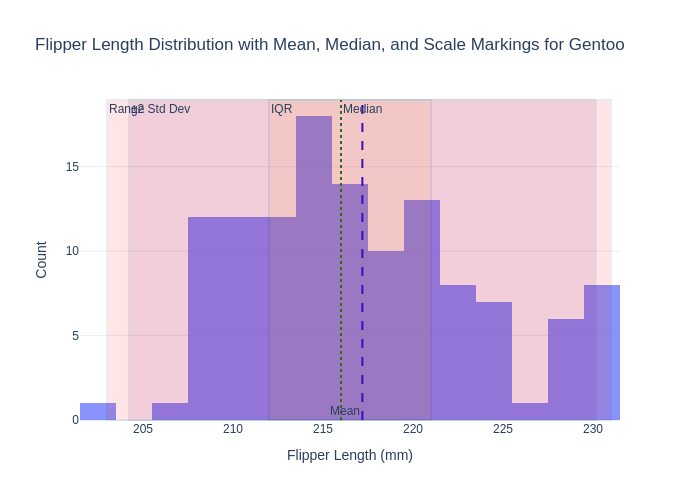

In [2]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
import plotly.io as pio

# Set default renderer to PNG for inline display
pio.renderers.default = 'png'

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing values in flipper_length_mm or species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Create histograms for each species
species_list = penguins['species'].unique()

for species in species_list:
    species_data = penguins[penguins['species'] == species]['flipper_length_mm']
    
    # Calculate statistical information
    mean_flipper = species_data.mean()
    median_flipper = species_data.median()
    flipper_range = [species_data.min(), species_data.max()]
    iqr_flipper = [species_data.quantile(0.25), species_data.quantile(0.75)]
    std_flipper = species_data.std()
    two_std_range = [mean_flipper - 2 * std_flipper, mean_flipper + 2 * std_flipper]
    
    # Create figure for the species
    fig = go.Figure()
    
    # Add histogram for the species
    fig.add_trace(go.Histogram(x=species_data, name=species, opacity=0.75))
    
    # Add vertical lines for mean and median
    fig.add_vline(x=mean_flipper, line_dash="dash", line_color="blue", annotation_text=f"Mean", annotation_position="bottom left")
    fig.add_vline(x=median_flipper, line_dash="dot", line_color="green", annotation_text=f"Median", annotation_position="top right")
    
    # Add shaded rectangle for flipper length range
    fig.add_vrect(x0=flipper_range[0], x1=flipper_range[1], fillcolor="red", opacity=0.1, annotation_text=f"Range", annotation_position="top left")
    
    # Add shaded rectangle for interquartile range (IQR)
    fig.add_vrect(x0=iqr_flipper[0], x1=iqr_flipper[1], fillcolor="orange", opacity=0.1, annotation_text=f"IQR", annotation_position="top left")
    
    # Add shaded rectangle for 2 standard deviations from the mean
    fig.add_vrect(x0=two_std_range[0], x1=two_std_range[1], fillcolor="purple", opacity=0.1, annotation_text=f"±2 Std Dev", annotation_position="top left")
    
    # Update layout with labels and title
    fig.update_layout(
        title=f"Flipper Length Distribution with Mean, Median, and Scale Markings for {species}",
        xaxis_title="Flipper Length (mm)",
        yaxis_title="Count",
        template="plotly_white"
    )
    
    # Display the figure as a PNG inline
    fig.show(renderer='png')

<h1 style="color:red;">Question II</h1>

<p>
    For this question, I tried my hand at coding the data visualisation myself. I looked at seaborn's <a href="https://seaborn.pydata.org/tutorial/distributions.html#kernel-density-estimation">KDE documentation</a> and used that to create the graph below.
    <br/>Then I also got some help from <a href="https://chatgpt.com/share/66f38518-ab04-8002-ba90-dbd405fe2fe7">ChatGPT</a> in the end too in the form of syntax and method documentation. However, I adapted the code from Question I and applied it myself to seaborn to get the graphs below!!
    <br/>I made a graph containing the three species' KDEs to make comparing them easier, then separated them to show the added information (as it was otherwise too cramped)
</p>

<p>
    <h3>Here is a summary of my discussion with ChatGPT for this question:</h3>
    <ol>
<li>Vertical Line in Seaborn Plot: You can add a vertical line to a Seaborn plot using plt.axvline(). If you are using a multi-plot grid (like FacetGrid from sns.displot()), you can access individual subplots using fig.axes[] and target specific subplots.</li>

<li>Adding a Label to the Line: You can add a label to a vertical line using the label argument in axvline(). However, when working with FacetGrid, you should call ax.legend() on the specific subplot you want to display the legend on.</li>

<li>Legend Placement: The position of the legend can be customized using the loc parameter in ax.legend(). There are several options, like 'upper left', 'lower right', etc.</li>

<li>Handling FacetGrid Legends: If the label isn’t appearing, ensure that you're using ax.legend() on the specific axis (subplot) where the vertical line is added. Avoid passing the handles argument unless necessary.</li>

<li>Seaborn Equivalent to Plotly's vrect: Seaborn doesn't have a direct equivalent of Plotly’s vrect. However, you can achieve the same effect using matplotlib's axvspan() to shade vertical regions on your plot.</li>
</ol>
</p>

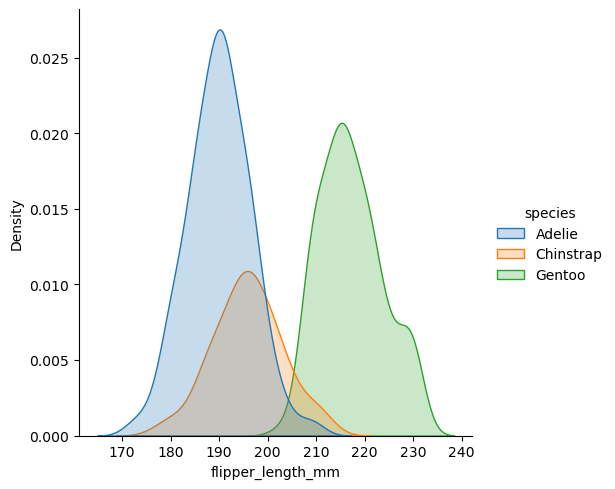

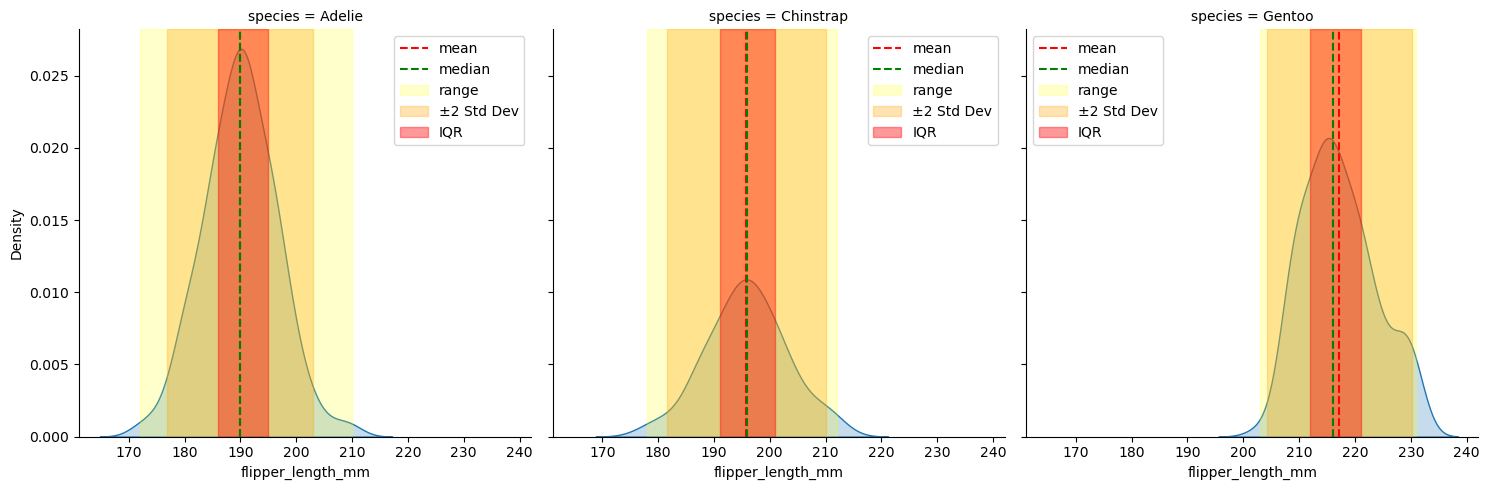

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the penguins dataset
penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Drop rows with missing values in flipper_length_mm or species
penguins = penguins.dropna(subset=['flipper_length_mm', 'species'])

# Create histograms for each species

fig = sns.displot(penguins, x="flipper_length_mm", hue="species", kind="kde", fill=True)


species_list = penguins['species'].unique()
fig = sns.displot(penguins, col="species", x="flipper_length_mm", kind="kde", fill=True)


i = 0  # Counter to access the ith species' subplot
for species in species_list:
    present_figure = fig.axes[0][i]  # Access the ith subplot
    
    species_data = penguins[penguins["species"] == species]["flipper_length_mm"].to_frame()  # Create a dataframe containing the info on the species we are studying
    
    mean_flipper = species_data.mean()
    median_flipper = species_data.median()
    flipper_range = [species_data.min(), species_data.max()]
    iqr_flipper = [species_data.quantile(0.25), species_data.quantile(0.75)]
    std_flipper = species_data.std()
    two_std_range = [mean_flipper - 2 * std_flipper, mean_flipper + 2 * std_flipper]
    
    present_figure.axvline(x=mean_flipper.iloc[0], linestyle="--", color="red", label="mean")
    present_figure.axvline(x=median_flipper.iloc[0], linestyle="--", color="green", label="median")
    present_figure.axvspan(xmin=flipper_range[0].iloc[0], xmax=flipper_range[1].iloc[0], color="yellow", alpha=0.2, label="range")
    present_figure.axvspan(xmin=two_std_range[0].iloc[0], xmax=two_std_range[1].iloc[0], color="orange", alpha=0.3, label="±2 Std Dev")
    present_figure.axvspan(xmin=iqr_flipper[0].iloc[0], xmax=iqr_flipper[1].iloc[0], color="red", alpha=0.4, label="IQR")

    
    i += 1
fig.axes[0][0].legend(loc="upper right")
fig.axes[0][1].legend(loc="upper right")
fig.axes[0][2].legend(loc="upper left")
plt.show()

<h1 style="color:red;">Question III</h1>

<p>
    My <a href='https://chatgpt.com/share/66f45769-7160-8002-9b7e-e2ff7dc437a4'>discussion with ChatGPT</a> gave this:
</p>


1. **Box Plot**:
   - **Your point**: Correct. A box plot summarizes the distribution of the data by showing the median, interquartile range (IQR), percentiles (such as the 25th and 75th), minimum, maximum, and potential outliers.
   - **Additional note**: The box plot is particularly useful for visualizing skewness and detecting outliers, but it doesn't provide as much detail about the shape of the distribution as a histogram or KDE does.

2. **KDE (Kernel Density Estimate)**:
   - **Your point**: Correct, but a bit more detail can be added. KDE provides a smoothed estimate of the probability density function of the continuous variable, based on a finite sample. It's useful for understanding the underlying distribution of the data, assuming that it follows a smooth, continuous pattern.
   - **Additional note**: The bandwidth (or smoothness) parameter in KDE can affect the level of detail—too large, and it oversmooths the data, too small, and it may be too noisy.

3. **Histogram**:
   - **Your point**: Correct, but I would clarify that a histogram shows the **frequency** of data points falling within certain ranges (or bins) in the sample. It is a discrete approximation of the probability distribution.
   - **Additional note**: Unlike KDE, a histogram can have rough edges depending on the binning, and it can miss finer details of the distribution.

### Pros and Cons List:

1. **Box Plot**:
   - **Pros**:
     - Very efficient at summarizing large datasets.
     - Excellent for detecting outliers and understanding spread.
     - Compact visualization.
   - **Cons**:
     - Doesn’t show detailed distribution shapes (e.g., multiple peaks, skewness beyond quartiles).
     - Loses individual data points unless augmented with jittered plots.

2. **KDE**:
   - **Pros**:
     - Provides a smooth estimate of the data's distribution.
     - Can give more detail about the shape (multi-modality, skewness) of the distribution.
     - Less affected by arbitrary bin width choices like histograms.
   - **Cons**:
     - Requires a smoothing parameter (bandwidth), which can be difficult to tune properly.
     - Assumes continuous data, so it's less useful for categorical or highly discrete data.
   
3. **Histogram**:
   - **Pros**:
     - Easy to understand and interpret.
     - Suitable for both continuous and discrete data.
     - Directly shows how the data is binned into ranges.
   - **Cons**:
     - Sensitive to bin width, which can hide or exaggerate patterns.
     - Doesn’t smooth the data, so it can appear jagged or noisy.
     - Requires manual adjustments of bin sizes to capture detail well.

Each method has its strengths, depending on the nature of the data and the goal of the analysis! Would you like to explore these with specific datasets?

Now personally, I like how KDEs and violin plots look (who doesn't). But in terms of reading statistics, of these three, I would say that the histogram is my favorite for the following reasons: It shows the mode of the graph, it uses bins to group data points together, it shows outliers by skewing if there are outliers (or just by having very small bins for the outliers. On top of that, we can add the box plot's data onto a histogram, just like we did in Question I. Now the reason I prefer histograms to KDEs is because unlike KDEs, it doesn't smooth out data. Furthermore, histograms can also work on discrete data, while KDEs always assume continuous data (just like ChatGPT said)

<h1 style="color:red;">Question IV</h1>

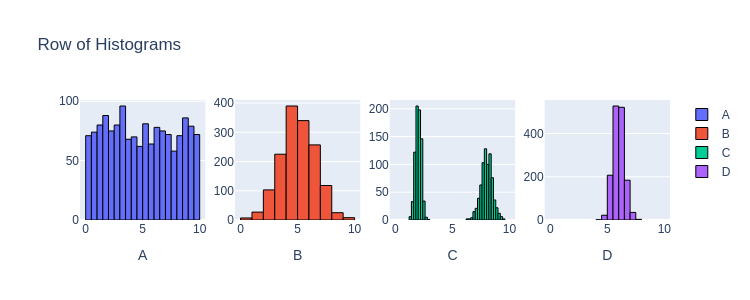

In [34]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

<ol>
    <li>
        Datasets A and C both look like they have a mean of around 5 and both have a high variance. So I'd say A and C have both similar means and similar variances
    </li>
    <li>
        A and B have similar means of 5 but a diffent variance, with B being more concentrated than B. The same applies to B and C
        <br/>So the pairs A and C have similar means to B but a different variance than B
    </li>
    <li>
        B and D are both very concentrated and have a similar low variance (although the variance is still pretty different, it is the closest variance between two graphs having a different mean).
    </li>
    <li>
        A and D have a very different mean, with A being closer to 5 and D being closer to 6-7, and a different variance, with D being much more concentrated around the mean than A.
    </li>
</ol>

After having interpreted the graphs by myself, I did use ChatGPT to verify my answers. However, I cannot share the discussion as I fed it the images. Here is the summary of the discussion:

Here's a concise summary of your analysis:

    Similar means and similar variances:
    A and C both have a mean around 5 and relatively high variances (A is uniform, C is bimodal).

    Similar means but different variances:
    A and B and B and C have similar means (around 5), but B has a lower variance compared to the higher variances of A and C.

    Similar variances but different means:
    B and D both have low variances, but B's mean is around 5, while D's mean is closer to 6-7.

    Different means and different variances:
    A and D differ in both mean (A closer to 5, D closer to 6-7) and variance (A has higher variance, D is more concentrated).

This summary captures the relationships between the datasets in terms of mean and variance.

<h1 style='color:red;'>Question V</h1>

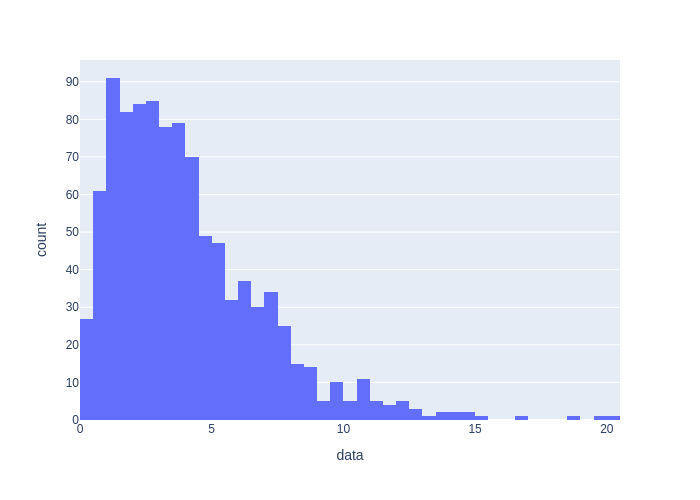

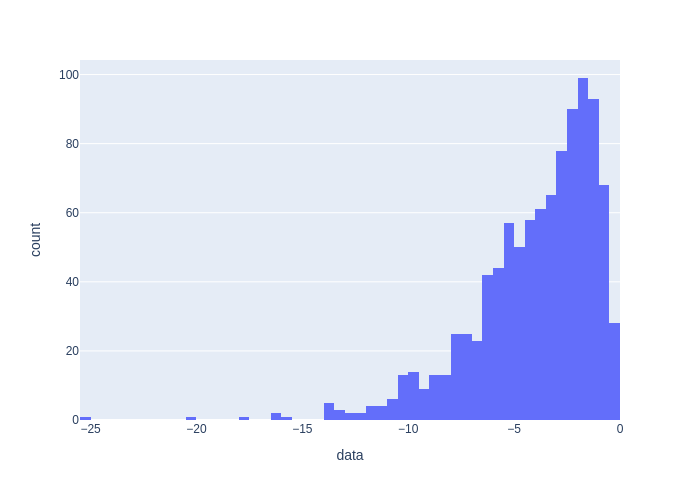

In [44]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
# USE `fig1.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

sample1.mean()
np.quantile(sample1, [0.5]) # median

sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig1.show(renderer='png')
fig2=px.histogram(pd.DataFrame({'data': sample2}), x="data")
fig2.show(renderer='png')

In terms of the median and mean's relationship with skewness, <a href="https://chatgpt.com/share/66f470b4-a318-8002-9350-f232cdf3e138">Chatgpt</a> says this:<br/><br/>
The **mean** and **median** are both measures of central tendency, but their relationship with **skewness** reveals important characteristics about a dataset's distribution.

- **Right Skewed (Positive Skewness):**
  - In a right-skewed distribution, the **tail** on the right side is longer than the left. This means there are a few large values pulling the average up.
  - **Mean > Median**: The mean is pulled toward the tail due to the influence of the larger values, while the median remains closer to the bulk of the data.
  - **Why?** Since the mean is sensitive to extreme values (because it considers all values), large values on the right tail increase it. The median, however, represents the middle value and is less affected by extremes.

- **Left Skewed (Negative Skewness):**
  - In a left-skewed distribution, the **tail** on the left side is longer, meaning there are some small values that drag the average down.
  - **Mean < Median**: The mean is pulled toward the lower tail, while the median remains closer to the majority of the data points.
  - **Why?** Similar to the right skew, extreme values (in this case, smaller ones) pull the mean lower, but the median, being resistant to outliers, stays near the center of the bulk of the data.

In both cases, the **magnitude of skewness** affects how far the mean is from the median. The greater the skewness, the larger the difference between the mean and the median.

<p>
    What I understand from that is that:</br>
For right-skewness; The majority of the values are on the left side of the graph, so that is where the median is going to be situated. However, the very large values on the tail are going to increase the mean's value by a lot. <br/>This makes it so the mean will be larger than the median, which is a way to find right-skewness.
</p>
<p>
    For left-skewness,it is very similar, but the sides change. i.e. the majority of values are on the right side of the graph,so that is where the median will be situated. However, the extremely low values on the tail are going to decrease the mean's value by a lot.<br/>This makes it so the mean will be smaller than the median, which is a way to find left-skewness.
</p>

<br/><p>
    For the code: it creates a random sample of 1000 data points (with stats.gama().rvs()), converts it into a dataframe and makes a histogram out of that.
    It then calculates the mean the median with np.quantile(df,[0.5])
    It then creates a second sample, in which all datapoints are opposite to the ones of sample1. Since here, sample1 is right-skewed, sample2 will thus be left-skewed.
</p>

Now to demonstrate:

In [71]:
from scipy import stats
import pandas as pd
import numpy as np
import plotly.express as px
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)

stats.gamma(a=2,scale=2).rvs(size=1000) creates a positively skewed (left-skewed) dataset with 1000 data points.

In [72]:
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

Here, we convert the data sample we made into a dataframe and make a histogram out of it, attributing said histogram to the variable fig1

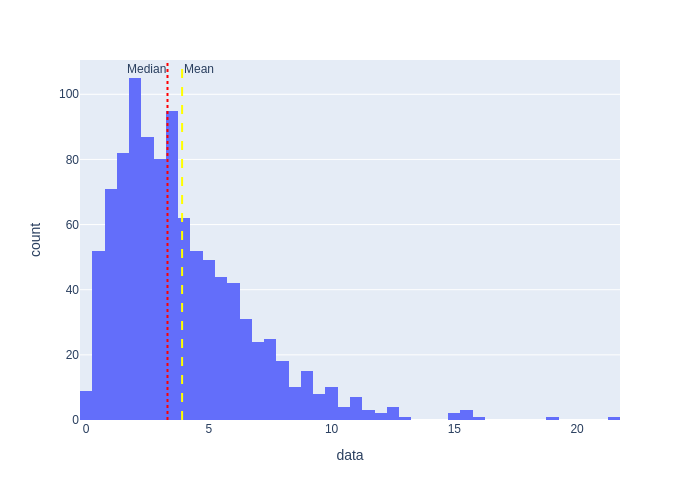

In [73]:
mean_1 = sample1.mean()
median_1 = np.quantile(sample1, [0.5])[0]
fig1.add_vline(x=mean_1, line_dash="dash", line_color="yellow", annotation_text=f"Mean", annotation_position="top right")
fig1.add_vline(x=median_1, line_dash="dot", line_color="red", annotation_text=f"Median", annotation_position="top left")
fig1.show(renderer='png')

What we did in the code above is we calculated the mean and median, and graphically showed them in the figure. We can see that the mean is larger than the median, which confirms what we'd said before for left-skewed figures. We can also extend this to the right-skewed figures with the code below:

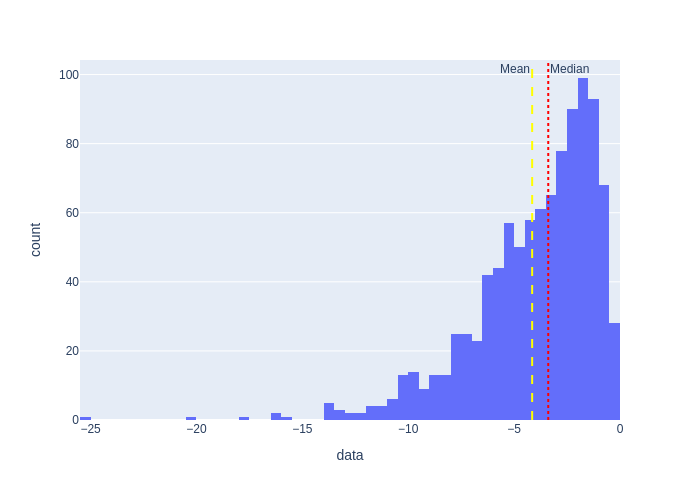

In [74]:
#We create the right-skewed dataset
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
#We make a figure out of the dataset
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")
#We calculate its mean, its median and show them graphically on the figure
mean_2 = sample2.mean()
median_2 = np.quantile(sample2, [0.5])[0]
fig2.add_vline(x=mean_2, line_dash="dash", line_color="yellow", annotation_text=f"Mean", annotation_position="top left")
fig2.add_vline(x=median_2, line_dash="dot", line_color="red", annotation_text=f"Median", annotation_position="top right")
fig2.show(renderer='png')

<br/><h1 style='color:red;'>Question VI</h1>

For this question, I have chosen to look at a <a href="https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2024/2024-10-01/chess.csv">chess dataset</a>, logging many chess games in different rankings. This can be really interesting to look at! The first things that came to mind were: A count of the ratings in each game, seeing the most common opening moves and which ones led to the largest proportion of wins, the proportion of black vs white wins, the proportion of rated games, how many wins are by resignation vs checkmate... And we could see the relation between these and the ranking of the players too!

The count of the ratings in each game is best represented as a histogram.

For the most common opening moves as well as their win proportions, we'd use bar graphs, as we are studying categories.

The proportion of black vs white wins could be a histogram or KDE with the ranking as the x-axis and the percentage of white wins, from which the black win percentage can be infered.

The proportion of rated games needs no figure, it is but one floating point number.

The wins by checkmate vs by resignation can be ordered by the ranking in a histogram or KDE.

I would've liked to use a box plot to look at the times taken for each game. However, the time-related data points of this set are unusable because of rounding issure :/ . For this reason, I will be dropping all three time-related columns

Thanks to <a href='https://chatgpt.com/share/66f61ddf-13ac-8002-a5e9-50b98efefb2c'>ChatGPT</a> for helping with the coding!!

Proportion of rated games: 0.8054142985342507


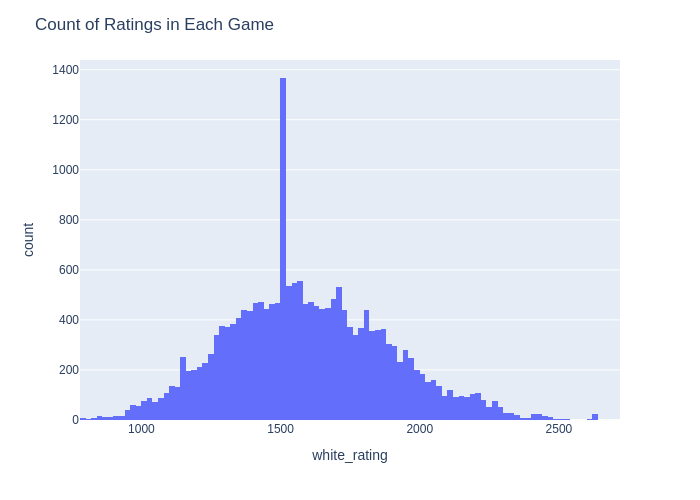

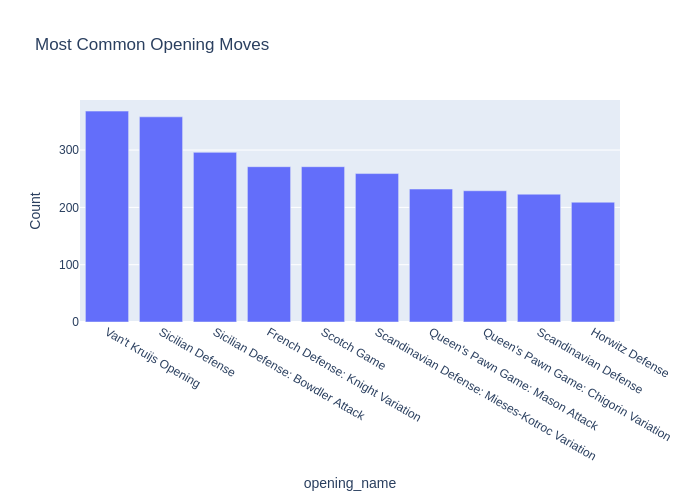

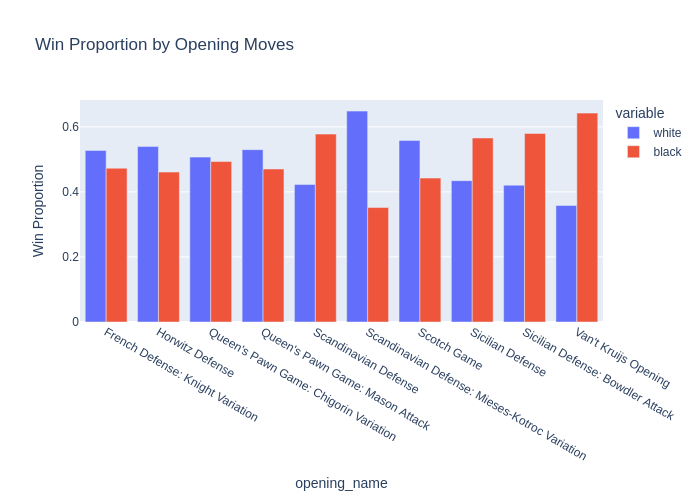

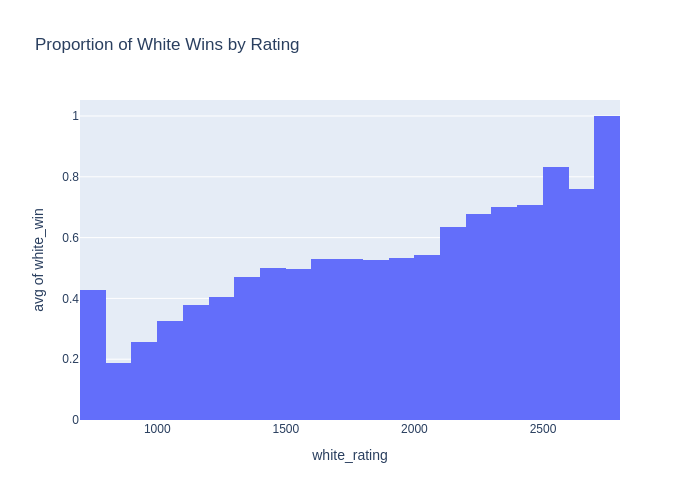

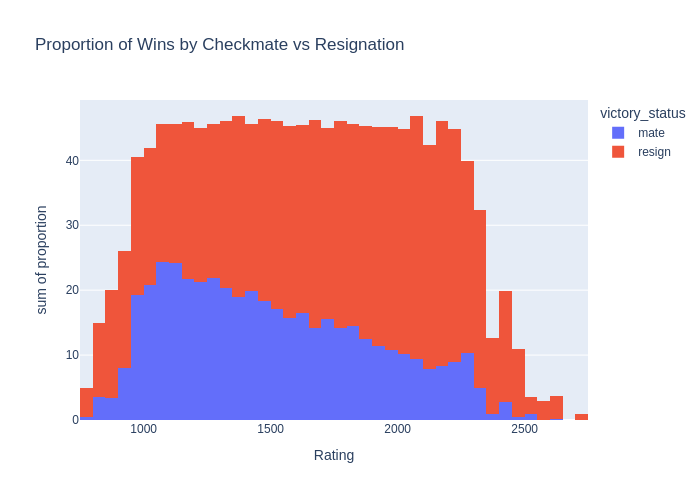

In [21]:
import pandas as pd
import plotly.express as px

# Load the dataset
url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2024/2024-10-01/chess.csv"
chess_data = pd.read_csv(url)

# Dropping the time-related columns due to rounding issues
chess_data = chess_data.drop(columns=['time_increment', 'start_time', 'end_time'])

# Histogram for the count of ratings in each game
fig_rating_histogram = px.histogram(chess_data, x='white_rating')
fig_rating_histogram.update_layout(title='Count of Ratings in Each Game')

# Bar graph for the most common opening moves
common_openings = chess_data['opening_name'].value_counts().head(10)
fig_common_openings = px.bar(common_openings, x=common_openings.index, y=common_openings.values, labels={'y':'Count', 'x':'Opening'}, title='Most Common Opening Moves')

# Bar graph for the opening moves that lead to the largest proportion of wins
opening_win_proportion = chess_data[chess_data['winner'] != 'draw'].groupby('opening_name')['winner'].value_counts(normalize=True).unstack().fillna(0)
opening_win_proportion = opening_win_proportion.loc[opening_win_proportion.index.isin(common_openings.index)]
fig_opening_win_proportion = px.bar(opening_win_proportion, x=opening_win_proportion.index, y=['white', 'black'], barmode='group', labels={'value':'Win Proportion', 'x':'Opening'}, title='Win Proportion by Opening Moves')

# KDE plot or histogram for proportion of black vs white wins by ranking
chess_data['white_win'] = (chess_data['winner'] == 'white').astype(int)
fig_win_proportion_ranking = px.histogram(chess_data, nbins=20, x='white_rating', y='white_win', histfunc='avg', labels={'y':'Proportion of White Wins', 'x':'Rating'}, title='Proportion of White Wins by Rating')

# Proportion of rated games
proportion_rated = chess_data['rated'].mean()

# Group the data by white_rating and victory_status (checkmate or resignation) and calculate proportions
win_by_method = chess_data[chess_data['winner'] != 'draw'].groupby(['white_rating', 'victory_status']).size().unstack(fill_value=0)
win_by_method = win_by_method.div(win_by_method.sum(axis=1), axis=0).reset_index()

# Melt the data to reshape it for stacked bar plot
win_by_method_melted = win_by_method.melt(id_vars='white_rating', value_vars=['mate', 'resign'], var_name='victory_status', value_name='proportion')

# Create a stacked bar plot to show the proportion of wins by checkmate vs resignation, grouped by rating
fig_win_method_ranking = px.histogram(win_by_method_melted, x='white_rating', y='proportion', color='victory_status',
                                labels={'proportionbin_size=100': 'Win Proportion', 'white_rating': 'Rating'},
                                title='Proportion of Wins by Checkmate vs Resignation')

# Show all figures and results
print(f'Proportion of rated games: {proportion_rated}')
fig_rating_histogram.show(renderer='png')
fig_common_openings.show(renderer='png')
fig_opening_win_proportion.show(renderer='png')
fig_win_proportion_ranking.show(renderer='png')
fig_win_method_ranking.show(renderer='png')


<p>
    And so, we can see that the big majority (80%) of games played are ranked,the ranking grouped around 1500 ELO, which has the largest amount of players,the most played opening is the Van't Kruijs Opening. The opening with the best chance of the white winning is the Scandinavian Defense: Mieses-Kotroc Variation and the one with the best chance of the black winning is the Van't Kruijs Opening. I'm not that much of a big chess player, so I don't really know these openings but I looked into them and I am surprised I've never seen them
</p>
<p>
    Now we can see that the further we climb in terms of ranking, the better of a chance the white has to win. This may be due to a difference in the openings played? Or maybe it's because the white plays a turn first, and since lower level players tend to make more mistakes than upper-level ones, the white has more chances of making mistakes first, which lead to them losing?
</p>
<p>
    The proportion of wins by checkmate, however, goes down considerably the higher the ELO, giving place to wins by resignation or other means (may that be time losses or draws). This makes sense. The better the player, the less mistakes they make and the better they are at not letting their opponent putting them in a checkmate.
</p>

<br/><h1 style="color:red;">Question VII</h1>

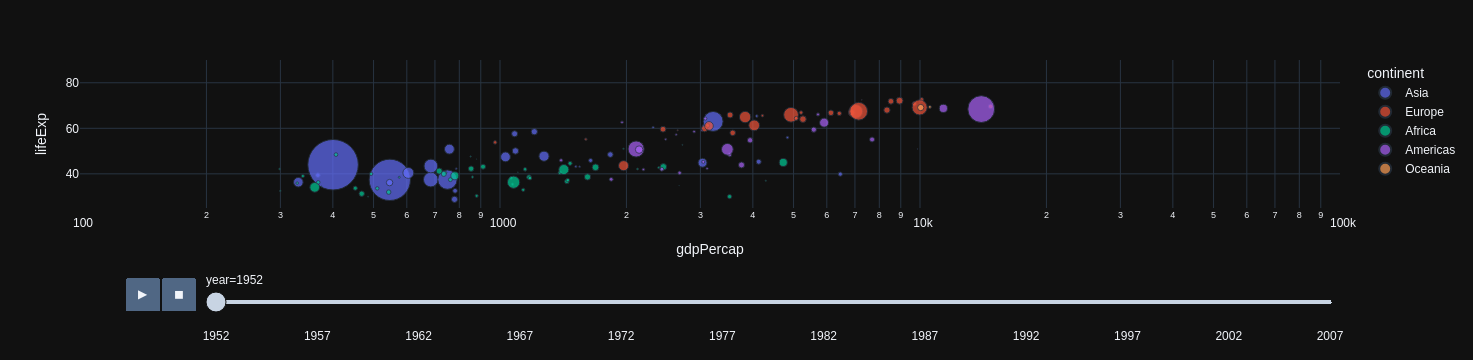

In [29]:
import plotly.express as px
df = px.data.gapminder()
fig = px.scatter(df,x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country", template="plotly_dark",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])
fig.show()

<br/><h1 style="color:red;">Question VIII</h1>

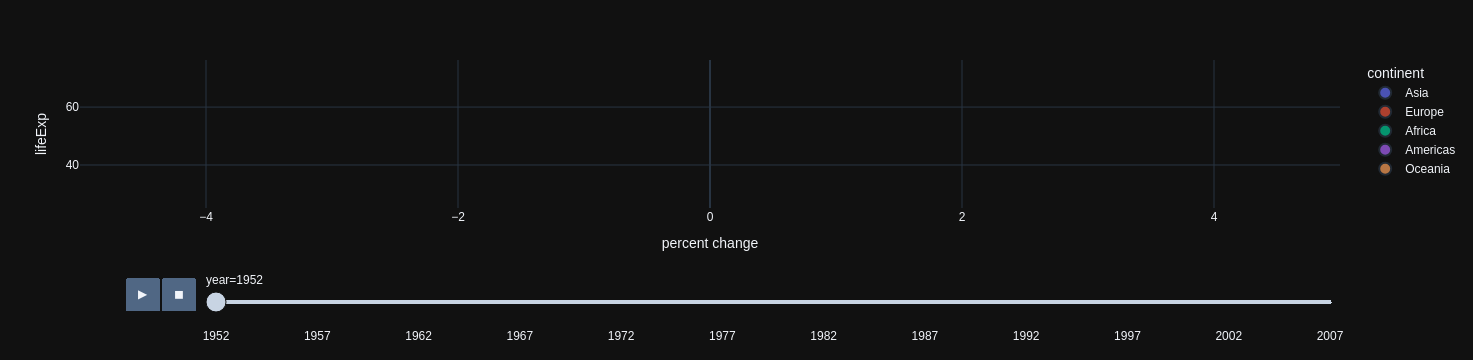

In [35]:
import plotly.express as px
import pandas as pd

# Load the gapminder dataset
df = px.data.gapminder()

# Calculate percent change in GDP per capita for each country across years
df['percent change'] = df.groupby('country')['gdpPercap'].pct_change() * 100

# Now create the scatter plot
fig = px.scatter(df, x="percent change", y="lifeExp", animation_frame="year", animation_group="country",
                 size="pop", color="continent", hover_name="country", template="plotly_dark",
                 size_max=50, range_x=[-5, 5])  # Adjust range_x to your needs
fig.show()
